In [48]:
#Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [49]:
#Reading the data from CSV file
df = pd.read_csv("SPTrial.csv")

In [50]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
1,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
3,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
4,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [51]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2635,2020-06-23,3138.699951,3154.899902,3127.120117,3131.290039,3131.290039,4704830000
2636,2020-06-24,3114.399902,3115.010010,3032.129883,3050.330078,3050.330078,5587200000
2637,2020-06-25,3046.600098,3086.250000,3024.010010,3083.760010,3083.760010,4815420000
2638,2020-06-26,3073.199951,3073.729980,3004.629883,3009.050049,3009.050049,8098120000
2639,2020-06-29,3018.590088,3053.889893,2999.739990,3053.239990,3053.239990,4462770000


In [52]:
#Subsetting the data as per business requirement
df1= df[df.Date< '2020-02-20']

In [53]:
df1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2544,2020-02-12,3370.500000,3381.469971,3369.719971,3379.449951,3379.449951,3926380000
2545,2020-02-13,3365.899902,3385.090088,3360.520020,3373.939941,3373.939941,3498240000
2546,2020-02-14,3378.080078,3380.689941,3366.149902,3380.159912,3380.159912,3398040000
2547,2020-02-18,3369.040039,3375.010010,3355.610107,3370.290039,3370.290039,3746720000
2548,2020-02-19,3380.389893,3393.520020,3378.830078,3386.149902,3386.149902,3600150000


In [54]:
df1=df1.reset_index()['Adj Close']

In [55]:
print(df1)

0       1132.989990
1       1136.520020
2       1137.140015
3       1141.689941
4       1144.979980
           ...     
2544    3379.449951
2545    3373.939941
2546    3380.159912
2547    3370.290039
2548    3386.149902
Name: Adj Close, Length: 2549, dtype: float64


In [56]:
df1.tail()

2544    3379.449951
2545    3373.939941
2546    3380.159912
2547    3370.290039
2548    3386.149902
Name: Adj Close, dtype: float64

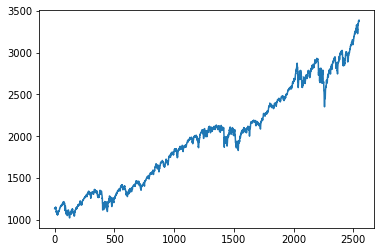

In [57]:
#Plotting the data for better understanding
plt.plot(df1)

In [59]:
df1

0       1132.989990
1       1136.520020
2       1137.140015
3       1141.689941
4       1144.979980
           ...     
2544    3379.449951
2545    3373.939941
2546    3380.159912
2547    3370.290039
2548    3386.149902
Name: Adj Close, Length: 2549, dtype: float64

In [60]:
#Transforming the data with MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [61]:
print(df1)

[[0.04671323]
 [0.04820674]
 [0.04846905]
 ...
 [0.9974657 ]
 [0.99328987]
 [1.        ]]


In [62]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [63]:
training_size,test_size

(1911, 638)

In [64]:
train_data

array([[0.04671323],
       [0.04820674],
       [0.04846905],
       ...,
       [0.61559003],
       [0.61330105],
       [0.61527695]])

In [65]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [66]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 150
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [67]:
print(X_train.shape), print(y_train.shape)

(1760, 150)
(1760,)


(None, None)

In [68]:
print(X_test.shape), print(ytest.shape)

(487, 150)
(487,)


(None, None)

In [69]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [70]:
ytest

array([0.7373296 , 0.73063207, 0.72972247, 0.7317025 , 0.71516392,
       0.71686475, 0.71474507, 0.68587349, 0.6624217 , 0.69216063,
       0.67272819, 0.66950421, 0.68468045, 0.65972234, 0.67350238,
       0.68629658, 0.6939757 , 0.66927996, 0.67295658, 0.69144987,
       0.68523886, 0.69446221, 0.69120868, 0.70032203, 0.71240114,
       0.71335309, 0.70679098, 0.69706417, 0.69712769, 0.68201074,
       0.68405842, 0.6957103 , 0.69696687, 0.6877182 , 0.69057405,
       0.68248031, 0.67996719, 0.69422102, 0.69811766, 0.69781728,
       0.70876264, 0.71945833, 0.72142566, 0.72244526, 0.71454199,
       0.7192002 , 0.71821437, 0.7151851 , 0.72366381, 0.72003791,
       0.72378229, 0.7214426 , 0.71872216, 0.70540757, 0.71985601,
       0.71192733, 0.72434503, 0.72952787, 0.7303444 , 0.74030816,
       0.73947046, 0.74313437, 0.74439093, 0.74644295, 0.7416958 ,
       0.74459824, 0.74340086, 0.74090045, 0.73617881, 0.73818001,
       0.73075055, 0.73291671, 0.7169198 , 0.7194541 , 0.70954

In [71]:
#Installing Tensorflow
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [72]:
#Installing keras
pip install Keras

Note: you may need to restart the kernel to use updated packages.


In [73]:
#Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [74]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(150,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 150, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 150, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
28/28 [==============================] - 11s 407ms/step - loss: 0.0125 - val_loss: 0.0214
Epoch 2/100
28/28 [==============================] - 9s 331ms/step - loss: 8.8212e-04 - val_loss: 0.0010
Epoch 3/100
28/28 [==============================] - 10s 342ms/step - loss: 2.9257e-04 - val_loss: 0.0015
Epoch 4/100
28/28 [==============================] - 10s 348ms/step - loss: 2.8677e-04 - val_loss: 0.0016
Epoch 5/100
28/28 [==============================] - 10s 347ms/step - loss: 2.6523e-04 - val_loss: 0.0014
Epoch 6/100
28/28 [==============================] - 10s 344ms/step - loss: 2.7099e-04 - val_loss: 0.0012
Epoch 7/100
28/28 [==============================] - 10s 340ms/step - loss: 2.6747e-04 - val_loss: 0.0015
Epoch 8/100
28/28 [==============================] - 9s 339ms/step - loss: 2.6334e-04 - val_loss: 0.0012
Epoch 9/100
28/28 [==============================] - 10s 345ms/step - loss: 2.5883e-04 - val_loss: 0.0014
Epoch 10/100
28/28 [==============================] 

In [77]:
import tensorflow as tf

In [78]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [79]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [80]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1795.7829831923311

In [81]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

2882.8322809195133

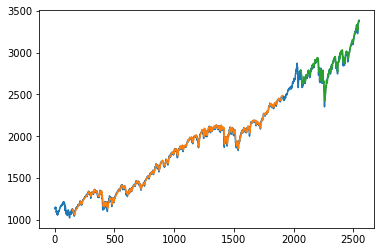

In [82]:
# Plotting 
# shift train predictions for plotting
look_back=150
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [83]:
x_input=test_data[488:].reshape(1,-1)
x_input.shape

(1, 150)

In [84]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [85]:
temp_input

[0.8300325357208552,
 0.834555433506888,
 0.826728290287046,
 0.8302906651732026,
 0.8389385761699194,
 0.8448999349134964,
 0.8381769955577177,
 0.847565414804733,
 0.8454964529216787,
 0.8422005744924271,
 0.8283232403767066,
 0.8169760726156824,
 0.807875427808643,
 0.7709355177369762,
 0.7866025095340051,
 0.7875375189086063,
 0.8104309007981797,
 0.8022059753904845,
 0.7869959529459821,
 0.8054511368932932,
 0.7691839757046152,
 0.7721455974634742,
 0.7895260160670053,
 0.8043214195039553,
 0.7945311898404054,
 0.8046514414783213,
 0.8040252780594216,
 0.7719382877481534,
 0.7851681804619032,
 0.7812673137862393,
 0.7892129341460111,
 0.8047149665726935,
 0.8055103240579663,
 0.7969681856900118,
 0.8102997183009041,
 0.8264701608346986,
 0.8276167150437358,
 0.8274982379038055,
 0.8279043866731278,
 0.8370177364144239,
 0.8406732813825811,
 0.839750873708564,
 0.8357611748805981,
 0.8390358781373627,
 0.8394716718943135,
 0.8394970821859157,
 0.8332692269854335,
 0.833146514726388

In [86]:
#prediction for next 60 days
from numpy import array

lst_output=[]
n_steps=150
i=0
while(i<60):
    
    if(len(temp_input)>150):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9988472]
151
1 day input [0.83455543 0.82672829 0.83029067 0.83893858 0.84489993 0.838177
 0.84756541 0.84549645 0.84220057 0.82832324 0.81697607 0.80787543
 0.77093552 0.78660251 0.78753752 0.8104309  0.80220598 0.78699595
 0.80545114 0.76918398 0.7721456  0.78952602 0.80432142 0.79453119
 0.80465144 0.80402528 0.77193829 0.78516818 0.78126731 0.78921293
 0.80471497 0.80551032 0.79696819 0.81029972 0.82647016 0.82761672
 0.82749824 0.82790439 0.83701774 0.84067328 0.83975087 0.83576117
 0.83903588 0.83947167 0.83949708 0.83326923 0.83314651 0.82249317
 0.83022301 0.82715561 0.82045809 0.82678324 0.81134474 0.78907339
 0.79881279 0.81632026 0.81072704 0.7913792  0.80252329 0.81044774
 0.82404587 0.82230269 0.83479652 0.83226222 0.83575694 0.83078565
 0.83946744 0.8349277  0.83853666 0.84097789 0.84616497 0.85330242
 0.85223199 0.85641217 0.85251553 0.86493313 0.86973946 0.86819523
 0.86910906 0.87266297 0.87600543 0.87343726 0.87548081 0.87641158
 0.87750732 0.88758956 0.88825383 0.

In [87]:
day_new=np.arange(1,151)
day_pred=np.arange(151,211)

In [89]:
len(df1)

2549

In [90]:
#plt.plot(day_new,scaler.inverse_transform(df1[2449:]))
#plt.plot(day_pred,scaler.inverse_transform(lst_output))
df5= df[df.Date >= '2020-02-20']
df5 = df5.reset_index()['Adj Close']

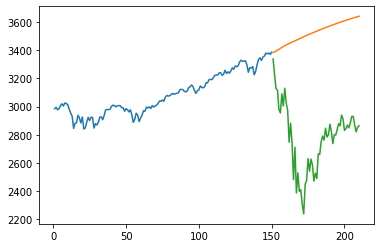

In [91]:
plt.plot(day_new,scaler.inverse_transform(df1[2399:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.plot(day_pred,df5[1:61])

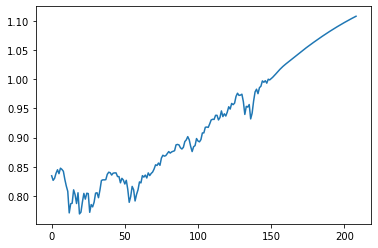

In [92]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2400:])

In [93]:
df3=scaler.inverse_transform(df3).tolist()

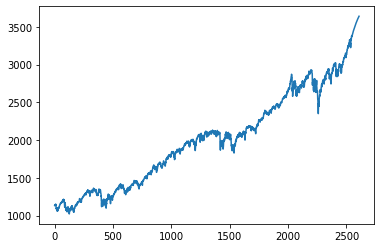

In [94]:
plt.plot(df3)